<a href="https://colab.research.google.com/github/JingRu-hi/gameRating/blob/main/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# packages

mar03 刪掉演算法5

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize


In [ ]:
!git clone https://github.com/JingRu-hi/gameRating.git

Cloning into 'gameRating'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 89 (delta 40), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (89/89), done.


In [ ]:
!ls gameRating

beach_volleyball.csv  double_2010to2019_id.csv	README.md  records


# parameter

In [ ]:
kwarg = {'start_mean' : 1500,
         'update_var':True,
         'file_name':None, 'L_div':1}
# 自己設定: start_sig, mode
start_sig = 100
single = False

init_sig = [80, 100, 120, 150, 180, 200,
            220, 250, 280, 300, 320, 350,
            380, 400, 420, 450, 480, 500,
            520, 550, 580, 600, 620, 650, 680, 700]

In [ ]:
date = 'Mar02/'
try:
  os.mkdir(date)
except:
  pass

In [ ]:
# double
# tennis
base = 'gameRating/'
path = 'double_2010to2019_id.csv'
print(path)

tennis = pd.read_csv(base+path,parse_dates= [0],header=0,
                     names=['tourney_date','surface','winner1_name','winner2_name','loser1_name','loser2_name'],
                     dtype={'winner1_name':'Int64','winner2_name':'Int64','loser1_name':'Int64','loser2_name':'Int64'})
tennis.head()

double_2010to2019_id.csv


,tourney_date,surface,winner1_name,winner2_name,loser1_name,loser2_name
0,2010-01-03,Hard,104160,102233,104958,105023
1,2010-01-03,Hard,104871,102967,102382,102963
2,2010-01-03,Hard,103566,103544,103429,102512
3,2010-01-03,Hard,104249,103946,104504,103459
4,2010-01-03,Hard,104607,103285,105064,103080


In [ ]:
# beach volley
base = 'gameRating/'
path = 'beach_volleyball.csv'
print(path)

volley = pd.read_csv(base+path,header=0,
                     names=['circuit','year','gender','winner1_name','winner2_name','loser1_name','loser2_name'])#,
                    #  parse_dates= [1],dtype={'winner1_id':'Int64','winner2_id':'Int64','loser1_name':'Int64','loser2_name':'Int64'})
volley.head()

beach_volleyball.csv


,circuit,year,gender,winner1_name,winner2_name,loser1_name,loser2_name
0,AVP,2002,M,Kevin Wong,Stein Metzger,Chuck Moore,Ed Ratledge
1,AVP,2002,M,Brad Torsone,Casey Jennings,Mark Paaluhi,Nick Hannemann
2,AVP,2002,M,Eduardo Bacil,Fred Souza,Adam Jewell,Collin Smith
3,AVP,2002,M,Brent Doble,Karch Kiraly,David Swatik,Mike Mattarocci
4,AVP,2002,M,Albert Hannemann,Jeff Nygaard,Adam Roberts,Jim Walls


In [ ]:
# clean
print(len(volley))
volley = volley[volley['gender']=="W"]
print(len(volley))

volley = volley[volley['circuit']=='FIVB']
print(len(volley))

volley = volley[volley['year']>=2007]
volley = volley[volley['year']<=2015]
print(len(volley))

81232
38583
26895
11596


# split

In [ ]:
# split by year
volley_tr = volley[volley['year'] < 2015]
volley_val = volley[volley['year'] >= 2015]

tennis_tr = tennis[tennis['tourney_date'].dt.year <= 2017]
tennis_val = tennis[tennis['tourney_date'].dt.year > 2017]

In [ ]:
volley_tr.tail()

,circuit,year,gender,winner1_name,winner2_name,loser1_name,loser2_name
56572,FIVB,2014,W,Sayaka Mizoe,Takemi Nishibori,Maria Tsiartsiani,Vasiliki Arvaniti
56573,FIVB,2014,W,Barbora Hermannova,Martina Bonnerova,Kim DiCello,Lane Carico
56574,FIVB,2014,W,Sayaka Mizoe,Takemi Nishibori,Evgeniya Ukolova,Maria Prokopeva
56575,FIVB,2014,W,Evgeniya Ukolova,Maria Prokopeva,Kim DiCello,Lane Carico
56576,FIVB,2014,W,Barbora Hermannova,Martina Bonnerova,Sayaka Mizoe,Takemi Nishibori


In [ ]:
tennis_tr.tail()

,tourney_date,surface,winner1_name,winner2_name,loser1_name,loser2_name
9854,2017-11-13,Hard,103594,106207,103184,103185
9855,2017-11-13,Hard,105573,105188,103828,104486
9856,2017-11-13,Hard,105573,105188,104071,104330
9857,2017-11-13,Hard,105992,105030,105573,105188
9858,2017-11-13,Hard,105992,105030,103828,104486


In [ ]:
# get 2 inputs(winners, losers)
# col_name = ['surface','winner_name','loser_name'] if config['single'] else ['surface','winner1_name','winner2_name','loser1_name','loser2_name']
col_name =  ['winner1_name','winner2_name','loser1_name','loser2_name']

volley_tr, volley_val = volley_tr[col_name], volley_val[col_name]
# winners,losers = volley_tr[col_name[:len(col_name)//2]], volley_tr[col_name[len(col_name)//2:]]
# winners_val,losers_val = volley_val[col_name[:len(col_name)//2]], volley_val[col_name[len(col_name)//2:]]

tennis_tr, tennis_val = tennis_tr[col_name], tennis_val[col_name]
# winners,losers = tennis_tr[col_name[:len(col_name)//2]], tennis_tr[col_name[len(col_name)//2:]]
# winners_val,losers_val = tennis_val[col_name[:len(col_name)//2]], tennis_val[col_name[len(col_name)//2:]]

tennis_val.head()

# volley_val.head()

,winner1_name,winner2_name,loser1_name,loser2_name
9859,105573,105188,105683,133430
9860,105051,105357,104592,106000
9861,106401,105591,105428,104693
9862,105777,105992,103720,111442
9863,105323,104677,104600,104802


## DESCRI

In [ ]:
print('trainning size: %d'%(volley_tr.shape[0]))
print('testing size: %d'%(volley_val.shape[0]))

trainning size: 9998
testing size: 1598


In [ ]:
print('trainning size: %d'%(tennis_tr.shape[0]))
print('testing size: %d'%(tennis_val.shape[0]))

trainning size: 9859
testing size: 2571


# analysis of structure for tr

In [ ]:
def get_all_players(data):
  all_players = []
  for game in np.arange(data.shape[0]):
    # f'{data.iloc[i,0]}',f'{data.iloc[i,1]}',f'{data.iloc[i,2]}',f'{data.iloc[i,3]}'
    all_players.extend([f'{player}' for player in data.iloc[game,:]])
  all_players = np.array(all_players)
  Structure = Counter(all_players)
  return all_players, Structure

def get_all_teams(data):
  all_teams = []
  for i in np.arange(data.shape[0]):
    all_teams.append(f'{data.iloc[i,0]}, {data.iloc[i,1]}')
    all_teams.append(f'{data.iloc[i,2]}, {data.iloc[i,3]}')
  all_teams = np.array(all_teams)
  Structure = Counter(all_teams)
  return all_teams, Counter(Structure)

def show_table(data, tabletype='teams'):
  tabletype = tabletype.lower()
  if tabletype == 'players':
    all, Structure = get_all_players(data)
  elif tabletype == 'teams':
    all, Structure = get_all_teams(data)
  table = pd.DataFrame(Structure.items()).transpose()
  return table

def get_teams_info(data, greater):
  all_teams, TeamStructure = get_all_teams(data)
  games = len(data) #len(all_teams)//2
  combinations = len(TeamStructure)
  cnt = TeamStructure.values() # dict_values()
  cnt = np.array([list(cnt)])
  print(f'#(repeat): {(cnt>greater).sum()} \t #(games): {games} \t #(combinations): {combinations} \t ratio: {((cnt>greater).sum()/combinations):.4f}')
  print(f'共{games}場比賽中，其中總共有{combinations}組隊伍，而這些隊伍出場只有{greater}次以內的隊伍共有{(cnt<=greater).sum()}組')

def find_repeat(data_tr, data_val, greater=1):
  p1 = set() # val只出現一次的組的人
  _, PlayerStructure_tr = get_all_players(data_tr)
  _, TeamStructure_val = get_all_teams(data_val)
  for k, v in TeamStructure_val.items():
    if v<=greater: p1.update(k.split(', '))
  repeat = p1 & set(PlayerStructure_tr) # intersection # 在train中出現過
  return repeat


def get_plot(data, name:str):
  all_teams, TeamStructure = get_all_teams(data)
  cnt_teams = TeamStructure.values() # dict_values()
  cnt_teams = np.array([list(cnt_teams)])
  all_players, PlayerStructure = get_all_players(data)
  cnt_players = PlayerStructure.values() # dict_values()
  cnt_players = np.array([list(cnt_players)])


  title = f'structure of teams({name})'
  fig = plt.figure()
  plt.hist(cnt_teams[0])
  # plt.title(title, fontsize =15)
  plt.xlabel('repeats', fontsize =15)
  plt.ylabel('freq', fontsize =15)
  # fig.set_size_inches(439/96,318/96)
  fig.savefig(title+'.png', dpi=200,bbox_inches="tight")
  fig.show()

  title = f'structure of players({name})'
  fig = plt.figure()
  plt.hist(cnt_players[0])
  # plt.title(title, fontsize =15)
  plt.xlabel('repeats', fontsize =15)
  plt.ylabel('freq', fontsize =15)
  # fig.set_size_inches(439/96,318/96)
  fig.savefig(title+'.png', dpi=200,bbox_inches="tight")
  fig.show()

In [ ]:
tennis_tr_players, tennis_tr_PlayerStructure = get_all_players(tennis_tr)
tennis_tr_teams, tennis_tr_TeamStructure = get_all_teams(tennis_tr)
volley_tr_players, volley_tr_PlayerStructure = get_all_players(volley_tr)
volley_tr_teams, volley_tr_TeamStructure = get_all_teams(volley_tr)

# analysis of structure for val

In [ ]:
tennis_val_players, tennis_val_PlayerStructure = get_all_players(tennis_val)
tennis_val_teams, tennis_val_TeamStructure = get_all_teams(tennis_val)
volley_val_players, volley_val_PlayerStructure = get_all_players(volley_val)
volley_val_teams, volley_val_TeamStructure = get_all_teams(volley_val)

# structure summary

## plot

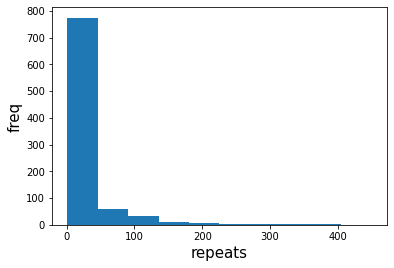

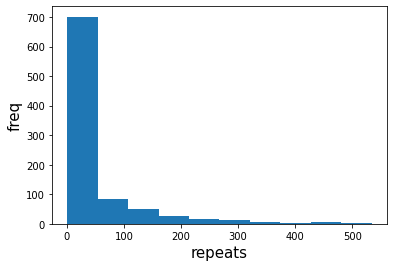

In [ ]:
get_plot(volley_tr,'volley_tr')

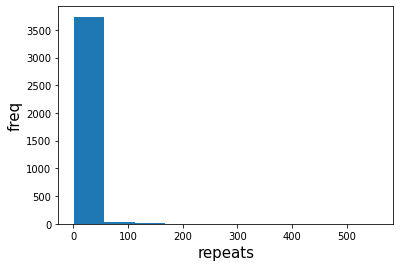

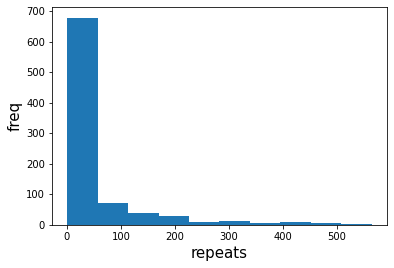

In [ ]:
get_plot(tennis_tr,'tennis_tr')

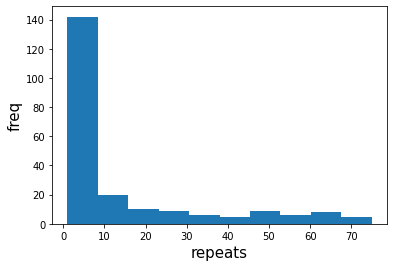

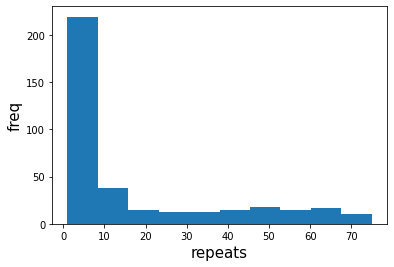

In [ ]:
get_plot(volley_val,'volley_val')

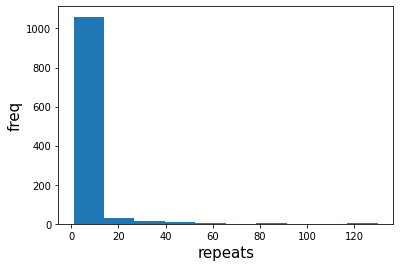

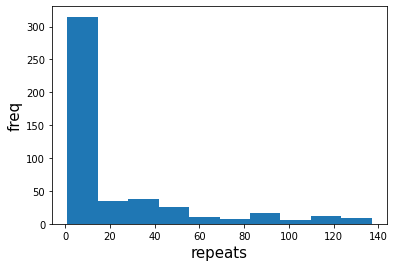

In [ ]:
get_plot(tennis_val,'tennis_val')

## info

In [ ]:
# player's debut is in val
def find_players_never(data_tr, data_val):
  _, PlayerStructure_tr = get_all_players(data_tr)
  _, PlayerStructure_val = get_all_players(data_val)
  never = set(PlayerStructure_val) -  set(PlayerStructure_tr)
  return never

In [ ]:
get_teams_info(volley_tr, 1)

#(repeat): 709 	 #(games): 9998 	 #(combinations): 896 	 ratio: 0.7913
共9998場比賽中，其中總共有896組隊伍，而這些隊伍出場只有1次以內的隊伍共有187組


In [ ]:
get_teams_info(volley_val, 1)

#(repeat): 170 	 #(games): 1598 	 #(combinations): 220 	 ratio: 0.7727
共1598場比賽中，其中總共有220組隊伍，而這些隊伍出場只有1次以內的隊伍共有50組


In [ ]:
volley_repeat = find_repeat(volley_tr,volley_val,1)
len(volley_repeat)

33

In [ ]:
get_teams_info(tennis_tr, 1)

#(repeat): 2137 	 #(games): 9859 	 #(combinations): 3790 	 ratio: 0.5639
共9859場比賽中，其中總共有3790組隊伍，而這些隊伍出場只有1次以內的隊伍共有1653組


In [ ]:
get_teams_info(tennis_val, 1)

#(repeat): 632 	 #(games): 2571 	 #(combinations): 1126 	 ratio: 0.5613
共2571場比賽中，其中總共有1126組隊伍，而這些隊伍出場只有1次以內的隊伍共有494組


In [ ]:
tennis_repeat = find_repeat(tennis_tr,tennis_val,1)
len(tennis_repeat)

293

In [ ]:
# tennis_tr_TeamStructure['103184, 103185'] # 557
# tennis_tr_PlayerStructure['103185'] # 564

557

# algorithm 2 (conservative)

In [ ]:
?np.log

In [ ]:
b = np.log(10)/400
b*(60**2)

20.723265836946414

In [ ]:
b*60**2

20.723265836946414

In [ ]:
os.chdir(date)

In [ ]:
def sigmoid(cur_mu_w, cur_mu_l):
  b = np.log(10)/400 
  x = b*(cur_mu_w-cur_mu_l)
  return 1/(1+np.exp(-x))

In [ ]:
def algorithm2_conservative(data ,start_sig,
                            start_mean = 1500,update_var=True,
                            file_name = None, mode = 'Train', L_div=1,prior_ratings=None):
  winners, losers = data.iloc[:,:data.shape[1]//2], data.iloc[:,data.shape[1]//2:]
  if file_name==None: file_name = 'algorithm2(conserative)_'+ mode + ('_both.txt' if update_var else '_only.txt')
  if mode.lower() =='train': 
    prior_ratings = defaultdict(lambda: (start_mean, start_sig**2)) 
  elif mode.lower() not in ['test','train']: 
    print(f'WARNING: Ur input of mode is {mode} and the current mode is "Train" ')

  with open(file_name,'w') as f:
    str2 = 'game, current_winner1, current_winner2, current_loser1, current_loser2, winner_mean, loser_mean, phat'
    f.write(str2+'\n')
    player_double = list(zip(winners['winner1_name'],winners['winner2_name'],losers['loser1_name'],losers['loser2_name']))      
    count, tie, total, total_discrepancy = 0,0,0,0
    b = np.log(10)/400
    for game in np.arange(winners.shape[0]):
        current_players = player_double[game]
        team_i = str(set(current_players[:2]))
        team_j = str(set(current_players[2:4]))

        for team in [team_i,team_j]:
          prior_ratings[team] if team not in prior_ratings else None

        # collect prior rating in player_rating        
        new_rating = prior_ratings.copy()

        # calculate team meam & variance
        winner_mean,winner_var = new_rating[team_i]
        loser_mean,loser_var = new_rating[team_j]

        # compare and count the correct prediction
        if winner_mean > loser_mean:
          count +=1
        if winner_mean == loser_mean:
          tie +=1
        total +=1

        # calculate p_iq ,p_qi   
        p_iq = sigmoid(winner_mean, loser_mean)
        p_qi = 1-p_iq
        # calculate C
        C = 1/(1+b*b* p_iq * p_qi*(winner_var + loser_var))
        # define s 比賽結果
        winner_s, loser_s = 1, 0
        # Ki
        K_i = winner_var*b*C*(winner_s-p_iq)
        K_q = loser_var*b*C*(loser_s-p_qi)
        # Li
        L_i = b**2*p_iq*p_qi*winner_var*C / L_div
        L_q = b**2*p_iq*p_qi*loser_var*C / L_div
        # sum discrepancy
        discrepancy = -np.log(p_iq)
        total_discrepancy += discrepancy
        # update winner
        new_rating[team_i] = (winner_mean + K_i,
                                          winner_var*(1-L_i) if update_var else winner_var )
        
        # update loser
        new_rating[team_j] = (loser_mean + K_q,
                                          loser_var*(1-L_q) if update_var else loser_var )
        # save record
        str2 ='%2d, %s, %s, %s, %s, %4.3f, %4.3f, %.4f\n'%(game+1,
                                                    current_players[0], current_players[1],
                                                    current_players[2],current_players[3],
                                                    winner_mean + K_i,  loser_mean + K_q, p_iq)
        f.write(str2) # save

        # update prior rating
        prior_ratings = new_rating
    f.close()
    error = total-count-tie
    misclassified_rate = error/total
    return prior_ratings, misclassified_rate, (total,count,tie), total_discrepancy # 總個數(n) - (預測正確 (a) + ties (t)) = error (e)

# algorithm 2 

In [ ]:
def algorithm2(data , start_sig,
               start_mean = 1500,update_var=True,
               file_name = None, mode = 'Train', L_div=1,prior_ratings=None):
    winners, losers = data.iloc[:,:data.shape[1]//2], data.iloc[:,data.shape[1]//2:]
    if file_name==None: file_name = 'algorithm2_'+ mode + ('_both.txt' if update_var else '_only.txt')
    if mode.lower() =='train':
      prior_ratings = defaultdict(lambda: (start_mean, start_sig**2)) 
    elif mode.lower() not in ['test','train']:
      print(f'WARNING: Ur input of mode is {mode} and the current mode is "Test" ')

    with open(file_name,'w') as f:
      str2 = 'game, current_winner1, current_winner2, current_loser1, current_loser2, winner_mean, loser_mean, phat'
      f.write(str2+'\n')
      player_double = list(zip(winners['winner1_name'],winners['winner2_name'],losers['loser1_name'],losers['loser2_name']))
      
      count, tie, total, total_discrepancy = 0,0,0,0
      b = np.log(10)/400
      for game in np.arange(winners.shape[0]):
        current_players = player_double[game]
        current_winner1, current_winner2 = current_players[0],current_players[1]
        current_loser1, current_loser2 = current_players[2],current_players[3]

        # collect prior rating in player_rating        
        new_rating = prior_ratings.copy()

        # each player mean & variance
        winner1_mean,winner1_var = new_rating[current_winner1]
        winner2_mean,winner2_var = new_rating[current_winner2]
        loser1_mean,loser1_var = new_rating[current_loser1]
        loser2_mean,loser2_var = new_rating[current_loser2]
        # calculate team meam & variance
        winner_mean = sum([winner1_mean,winner2_mean])
        winner_var = sum([winner1_var,winner2_var])
        loser_mean = sum([loser1_mean,loser2_mean])
        loser_var = sum([loser1_var,loser2_var])
        # compare and count the correct prediction
        if winner_mean > loser_mean:
          count +=1
        if winner_mean == loser_mean:
          tie +=1
        total +=1

        # calculate p_iq ,p_qi   
        p_iq = sigmoid(winner_mean, loser_mean)
        p_qi = 1-p_iq
        # calculate C
        C = 1/(1+b*b* p_iq * p_qi*(winner_var + loser_var))
        # define s 比賽結果
        winner_s, loser_s = 1, 0
        # Ki
        K_i = winner_var*b*C*(winner_s-p_iq)
        K_q = loser_var*b*C*(loser_s-p_qi)
        # Li
        L_i = b**2*p_iq*p_qi*winner_var*C/ L_div
        L_q = b**2*p_iq*p_qi*loser_var*C/ L_div
        # sum discrepancy
        discrepancy = -np.log(p_iq)
        total_discrepancy += discrepancy

        # Indiviual skill update
        # update winner
        new_rating[current_winner1] = (winner1_mean + winner1_var/winner_var*K_i,
                                          winner1_var*(1-winner1_var/winner_var*L_i) if update_var else winner1_var )
        new_rating[current_winner2] = (winner2_mean + winner2_var/winner_var*K_i,
                                          winner2_var*(1-winner2_var/winner_var*L_i) if update_var else winner2_var )
        # update loser
        new_rating[current_loser1] = (loser1_mean + loser1_var/loser_var*K_q,
                                          loser1_var*(1-loser1_var/loser_var*L_q) if update_var else loser1_var )
        new_rating[current_loser2] = (loser2_mean + loser2_var/loser_var*K_q,
                                          loser2_var*(1-loser2_var/loser_var*L_q) if update_var else loser2_var )
       # save record
        str2 ='%2d, %s, %s, %s, %s, %4.3f, %4.3f, %.4f\n'%(game+1,
                                                    current_players[0], current_players[1],
                                                    current_players[2],current_players[3],
                                                    winner_mean + K_i,  loser_mean + K_q, p_iq)
        f.write(str2) # save
        # update prior rating
        prior_ratings = new_rating
    f.close()
    error = total-count-tie
    misclassified_rate = error/total
    return prior_ratings, misclassified_rate, (total,count,tie), total_discrepancy 
    # 總個數(n) - (預測正確 (a) + ties (t)) = error (e)

# optimize

In [ ]:
def optimize_parameter(data, alg='alg2c',
    start_sig= 100,
    verbose = True, tolerance = 1e-2):
    
    def fun_to_minimize(theta, alg=alg):
        sig = abs(theta)
        if alg.lower() =='alg2c':
          _, _, _,discrepancy = algorithm2_conservative(data,start_sig = sig,**kwarg) 
        elif alg.lower() =='alg2':
          _, _, _,discrepancy = algorithm2(data,start_sig = sig,**kwarg)

        if verbose:
            print(f'sig: {sig[0]} ; discrepancy: {discrepancy[0]}')
        return discrepancy

    opt_result = minimize(fun_to_minimize,
                          np.array([start_sig],dtype='float'),
                          method='Nelder-Mead',
                          tol=tolerance,)
    return {'start_sig':opt_result.x[0]} # parameter

In [ ]:
train_parameter = optimize_parameter(tennis_tr,start_sig=600)
# 80

sig: 600.0 ; discrepancy: 9691.439461386726
sig: 630.0 ; discrepancy: 10177.734884160707
sig: 570.0 ; discrepancy: 9243.051571023268
sig: 540.0 ; discrepancy: 8830.889914085134
sig: 480.0 ; discrepancy: 8130.833880966572
sig: 420.0 ; discrepancy: 7583.012530485053
sig: 300.0 ; discrepancy: 6882.884328482894


KeyboardInterrupt: ignored

In [ ]:
# 150
train_parameter = optimize_parameter(volley_tr,start_sig=600)

# train

In [ ]:
# kwarg['update_var']=True
print(kwarg)
print(start_sig)

In [ ]:
# estimate2c, acc_c1,_,loss2c_tr = algorithm2_conservative(winners,losers,start_sig=start_sig,**kwarg)
# _, acc2c,tie2c,loss2c_val = algorithm2_conservative(winners_val,losers_val,
#                                              start_sig=start_sig,**kwarg,
#                                              prior_ratings=estimate2c,mode='test')

In [ ]:
# print(acc2c)
# tmp1, acc_c1,_ = algorithm2(winners,losers,start_sig=start_sig,**kwarg)
# _, acc2,tie2 = algorithm2(winners_val, losers_val,**kwarg,
#                               start_sig = start_sig, mode = 'test', prior_ratings=tmp1)
# print(acc2)

# zip all records

In [ ]:
# os.chdir('../')
# !zip -r filename.zip Mar02

  adding: Mar02/ (stored 0%)
  adding: Mar02/structure of players(tennis_val).png (deflated 21%)
  adding: Mar02/structure of teams(tennis_tr).png (deflated 23%)
  adding: Mar02/structure of players(tennis_tr).png (deflated 22%)
  adding: Mar02/structure of teams(tennis_val).png (deflated 23%)
  adding: Mar02/structure of players(volley_tr).png (deflated 22%)
  adding: Mar02/structure of players(volley_val).png (deflated 23%)
  adding: Mar02/structure of teams(volley_val).png (deflated 21%)
  adding: Mar02/.ipynb_checkpoints/ (stored 0%)
  adding: Mar02/structure of teams(volley_tr).png (deflated 22%)


# train and test for various sigma values, update only mean

In [ ]:
file_name = 'errRate_alg2conserve'
file_name +='_both.txt' if kwarg['update_var'] else '_only.txt'
print(file_name)

all_err2ctrain=[]
all_err2c=[]
all_num2c=[]

with open(file_name, 'w', encoding="utf-8") as f:
  # f.write('update_var: %s \n'%str(update_var))
  f.write('%3s, %2s, %2s, %2s\n'%('sig','errTrain','errTest',"(n,a,t)"))
  for i in range(len(init_sig)):
    estimate2c, err2ctrain,_ = algorithm2_conservative(winners,losers,start_sig=init_sig[i],**kwarg)
    _, err2c,num2c = algorithm2_conservative(winners_val,losers_val, start_sig=init_sig[i],**kwarg,
                                             prior_ratings=estimate2c,mode='test')
    # print(acc_c1,acc_c2)
    all_err2ctrain.append(err2ctrain)
    all_err2c.append(err2c) 
    all_num2c.append(num2c) 
    # str_w = '%3d, %.4f, %3d'%(init_sig[i],acc2c,tie2c)
    str_w = f'{init_sig[i]:3d}, {err2ctrain:.4f},{err2c:.4f},{num2c}'
    f.write(str_w+"\n") # save
f.close()

sigMin_idx_tr = all_err2ctrain.index(min(all_err2ctrain))
sigMin_idx_te = all_err2c.index(min(all_err2c))
print('sig with min error rate in train: %d'%(init_sig[sigMin_idx_tr]))
print('sig with min error rate in test: %d'%(init_sig[sigMin_idx_te]))

estimate2c, err2ctrain,_ = algorithm2_conservative(winners,losers,start_sig=init_sig[sigMin_idx_tr],**kwarg)
_, err2c,num2c = algorithm2_conservative(winners_val,losers_val, start_sig=init_sig[sigMin_idx_tr],**kwarg,
                                             prior_ratings=estimate2c,mode='test')

plt.plot(init_sig,all_err2c)
plt.axvline(init_sig[sigMin_idx_te],c='red')
plt.xlabel('sigma value',fontsize=14)
plt.ylabel('error rate',fontsize=14)
# plt.title('algorithm2(conservative) for different sigma')
# plt.axvline(init_sig[sigMin_idx2],c='red')
title2 = 'error_alg2conserve'
title2 += '_both.png' if kwarg['update_var'] else '_only.png'
plt.savefig(title2)
plt.show()

errRate_alg2conserve_only.txt
sig with min error rate in train: 80
sig with min error rate in test: 120


errRate_alg2_only.txt
sig with min error rate in train: 80
sig with min error rate in test: 80


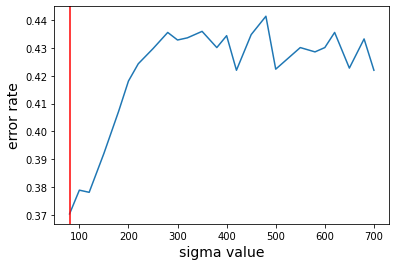

In [ ]:
file_name = 'errRate_alg2'
file_name +='_both.txt' if kwarg['update_var'] else '_only.txt'
print(file_name)

all_err2train=[]
all_err2=[]
all_num2=[]

with open(file_name, 'w') as f:
  # f.write('update_var: %s \n'%str(update_var))
  f.write('%3s, %2s, %2s, %2s\n'%('sig','errTrain','errTest',"(n,a,t)"))
  for i in range(len(init_sig)):
    estimate2, err2train,_ = algorithm2(winners,losers,start_sig=init_sig[i],**kwarg)
    _, err2,num2 = algorithm2(winners_val,losers_val, start_sig=init_sig[i],**kwarg,
                                             prior_ratings=estimate2,mode='test')
    # print(acc_c1,acc_c2)
    all_err2train.append(err2train)
    all_err2.append(err2) 
    all_num2.append(num2) 
    # str_w = '%3d, %.4f, %3d'%(init_sig[i],acc2,tie2)
    str_w = f'{init_sig[i]:3d}, {err2train:.4f},{err2:.4f},{num2}'
    f.write(str_w+"\n") # save
f.close()

sigMin_idx_tr = all_err2train.index(min(all_err2train))
sigMin_idx_te = all_err2.index(min(all_err2))
print('sig with min error rate in train: %d'%(init_sig[sigMin_idx_tr]))
print('sig with min error rate in test: %d'%(init_sig[sigMin_idx_te]))

estimate2, err2train,_ = algorithm2(winners,losers,start_sig=init_sig[sigMin_idx_tr],**kwarg)
_, err2,num2 = algorithm2(winners_val,losers_val, start_sig=init_sig[sigMin_idx_tr],**kwarg,
                                             prior_ratings=estimate2,mode='test')
    

plt.plot(init_sig,all_err2)
plt.axvline(init_sig[sigMin_idx_te],c='red')
plt.xlabel('sigma value',fontsize=14)
plt.ylabel('error rate',fontsize=14)
# plt.title('algorithm2 for different sigma')
# plt.axvline(init_sig[sigMin_idx2],c='red')
title2 = 'error_alg2'
title2 += '_both.png' if kwarg['update_var'] else '_only.png'
plt.savefig(title2)
plt.show()

In [ ]:
# df = pd.DataFrame({'sig':init_sig, 'err2':all_err2,'err2c':all_err2c})#,'acc5':all_acc5})
# df
# path = 'allACCcompare(both).csv' if kwarg['update_var'] else  'all_errorRate_compare(only).csv'
# df.to_csv(path,index = False)

# train and test for various sigma values, update both mean & var

In [ ]:
kwarg['update_var']=True
print(kwarg)

{'start_mean': 1500, 'update_var': True, 'file_name': None, 'L_div': 1}


errRate_alg2conserve_both.txt
sig with min error rate in train: 80
sig with min error rate in test: 150


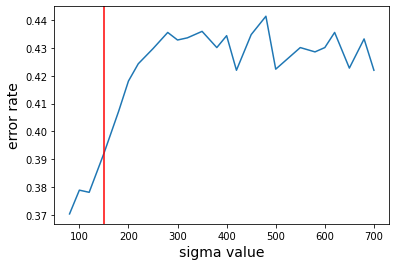

In [ ]:
file_name = 'errRate_alg2conserve'
file_name +='_both.txt' if kwarg['update_var'] else '_only.txt'
print(file_name)

all_err2ctrainBoth=[]
all_err2cBoth=[]
all_num2cBoth=[]

with open(file_name, 'w', encoding="utf-8") as f:
  f.write('%3s, %2s, %2s, %2s\n'%('sig','errTrain','errTest',"(n,a,t)"))
  for i in range(len(init_sig)):
    estimate2c, err2ctrain,_ = algorithm2_conservative(winners,losers,start_sig=init_sig[i],**kwarg)
    _, err2c,num2c = algorithm2_conservative(winners_val,losers_val, start_sig=init_sig[i],**kwarg,
                                             prior_ratings=estimate2c,mode='test')
    # print(acc_c1,acc_c2)
    all_err2ctrainBoth.append(err2ctrain) 
    all_err2cBoth.append(err2c) 
    all_num2cBoth.append(num2c) 
    # str_w = '%3d, %.4f, %3d'%(init_sig[i],acc2c,tie2c)
    str_w = f'{init_sig[i]:3d}, {err2ctrain:.4f},{err2c:.4f},{num2c}'
    f.write(str_w+"\n") # save
f.close()

sigMin_idx_tr = all_err2ctrainBoth.index(min(all_err2ctrainBoth))
sigMin_idx_te = all_err2cBoth.index(min(all_err2cBoth))
print('sig with min error rate in train: %d'%(init_sig[sigMin_idx_tr]))
print('sig with min error rate in test: %d'%(init_sig[sigMin_idx_te]))

algorithm2_conservative(winners,losers,start_sig=init_sig[sigMin_idx_tr],**kwarg)
algorithm2_conservative(winners_val,losers_val, start_sig=init_sig[sigMin_idx_tr],**kwarg,
                                             prior_ratings=estimate2c,mode='test')

plt.plot(init_sig,all_err2cBoth)
plt.axvline(init_sig[sigMin_idx_te],c='red')
plt.xlabel('sigma value',fontsize=14)
plt.ylabel('error rate',fontsize=14)
# plt.title('algorithm2 for different sigma')
# plt.axvline(init_sig[sigMin_idx2],c='red')
title2 = 'error_alg2conserve'
title2 += '_both.png' if kwarg['update_var'] else '_only.png'
plt.savefig(title2)
plt.show()

errRate_alg2_both.txt
sig with min error rate in train: 220
sig with min error rate in test: 180


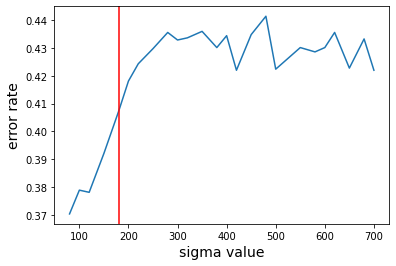

In [ ]:
file_name = 'errRate_alg2'
file_name +='_both.txt' if kwarg['update_var'] else '_only.txt'
print(file_name)

all_err2trainBoth=[]
all_err2Both=[]
all_num2Both=[]

with open(file_name, 'w') as f:
  f.write('%3s, %2s, %2s, %2s\n'%('sig','errTrain','errTest',"(n,a,t)"))
  for i in range(len(init_sig)):
    estimate2, err2train,_ = algorithm2(winners,losers,start_sig=init_sig[i],**kwarg)
    _, err2,num2 = algorithm2(winners_val,losers_val, start_sig=init_sig[i],**kwarg,
                                             prior_ratings=estimate2,mode='test')
    # print(acc_c1,acc_c2)
    all_err2trainBoth.append(err2train) 
    all_err2Both.append(err2) 
    all_num2Both.append(num2) 
    # str_w = '%3d, %.4f, %3d'%(init_sig[i],acc2,tie2)
    str_w = f'{init_sig[i]:3d}, {err2train:.4f},{err2:.4f},{num2}'
    f.write(str_w+"\n") # save
f.close()

sigMin_idx_tr = all_err2trainBoth.index(min(all_err2trainBoth))
sigMin_idx_te = all_err2Both.index(min(all_err2Both))
print('sig with min error rate in train: %d'%(init_sig[sigMin_idx_tr]))
print('sig with min error rate in test: %d'%(init_sig[sigMin_idx_te]))

algorithm2(winners,losers,start_sig=init_sig[sigMin_idx_tr],**kwarg)
algorithm2(winners_val,losers_val, start_sig=init_sig[sigMin_idx_tr],**kwarg,
                                             prior_ratings=estimate2,mode='test')

plt.plot(init_sig,all_err2)
plt.axvline(init_sig[sigMin_idx_te],c='red')
plt.xlabel('sigma value',fontsize=14)
plt.ylabel('error rate',fontsize=14)
# plt.title('algorithm2 for different sigma')
# plt.axvline(init_sig[sigMin_idx2],c='red')
title2 = 'error_alg2'
title2 += '_both.png' if kwarg['update_var'] else '_only.png'
plt.savefig(title2)
plt.show()

# plot the err for diff sig

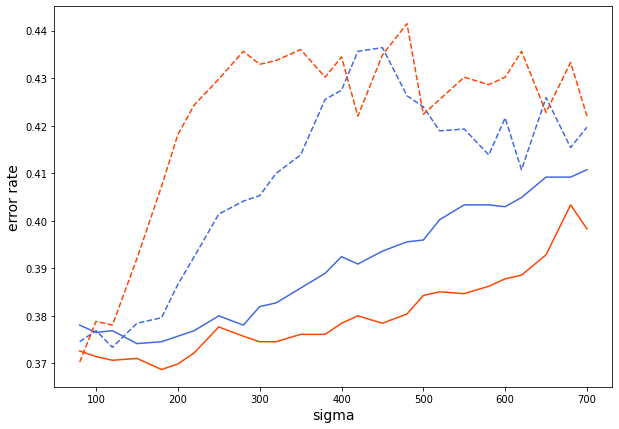

In [ ]:
plt.plot(init_sig,all_err2cBoth,'royalblue',label='algorithm2(conservative) update var')
plt.plot(init_sig,all_err2c,'royalblue',ls='--',label='algorithm2(conservative) constant var')
plt.plot(init_sig,all_err2Both,'orangered',label='algorithm2 update var')
plt.plot(init_sig,all_err2,'orangered',ls='--',label='algorithm2 constant var')
# plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
# plt.legend()
plt.xlabel('sigma',fontsize=14)
plt.ylabel('error rate',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('errorRateVolley.png')
plt.show()